## 2.1 A first look at a neural network

The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

### *Loading the MNIST dataset in Keras*

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape)
print(len(train_labels))
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
print(test_images.shape)
print(len(test_labels))
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows: First, we’ll feed the neural network the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

###  *The network architecture*

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the *layer*, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract *representations* out of the data fed into them — hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive *data distillation*. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters — the layers.

Here, our network consists of a sequence of two `Dense` layers, which are densely connected (also called *fully connected*) neural layers. The second (and last) layer is a 10-way *softmax* layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make the network ready for training, we need to pick three more things, as part of the compilation step:
- A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.
- Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

### *The compilation step*

In [5]:
model.compile(optimizer='rmsprop',\
                loss='categorical_crossentropy',\
                metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the `[0, 1]` interval. Previously, our training images, for instance, were stored in an array of shape `(60000, 28, 28)` of type `uint8` with values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

### *Preparing the image data*


In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step that’s explained in chapter 3.
### *Preparing the labels*

In [7]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2660 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1080 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0701 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0512 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9887


In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [10]:
len(history_dict['accuracy'])

5

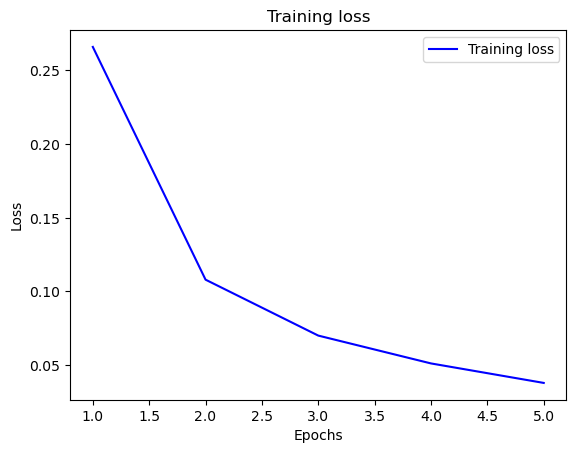

In [11]:
import matplotlib.pyplot as plt
acc_values = history_dict['accuracy']
loss_values = history_dict['loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

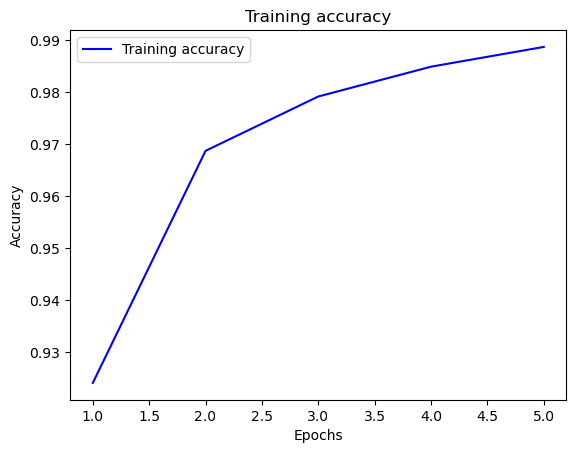

In [12]:
plt.clf()

plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### *Using the model to make predictions*

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 101ms/step


array([9.9063236e-08, 9.0583390e-09, 4.7904859e-06, 4.3021551e-05,
       2.7234545e-10, 4.0743657e-08, 5.1639266e-12, 9.9994540e-01,
       1.4755791e-07, 6.4684914e-06], dtype=float32)

Each number of index `i` in that array corresponds to the probability that digit image `test_digits[0]` belongs to class `i`.
 This first test digit has the highest probability score (0.999454, almost 1) at
index 7, so according to our model, it must be a 7:

In [15]:
print(predictions[0].argmax())
print(predictions[0][7])

7
0.9999454


### *Evaluating the model on new data*

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9817
test_acc: 0.9817000031471252
